### Sep

In [1]:
import pandas as pd
import json
from collections import defaultdict as ddict
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/sep_cluster.csv')

In [3]:
df.head(5)

,Unnamed: 0,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,URL after redirects,Final URL,suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,0,forbes.com.br,https://forbes.com.br/negocios/2020/06/astraze...,83,0,0,143266.0,104.26.8.58,cloudflare,None,https://forbes.com.br/negocios/2020/06/astraze...,N,100,0,0,0,0,N,8,1
1,1,google.com,https://www.google.com/amp/s/www.elespanol.com...,83,0,0,77255.0,173.194.193.106,nginx,https://www.elespanol.com/invertia/observatori...,https://www.elespanol.com/invertia/observatori...,N,142,0,0,0,0,N,6,2
2,2,xhne.ws,http://xhne.ws/yXuub,83,0,0,23767.0,203.192.12.6,Tengine,http://www.xinhuanet.com/english/2020-09/02/c_...,http://www.xinhuanet.com/english/2020-09/02/c_...,N,59,0,0,0,0,N,1,2
3,3,nbcnews.com,https://www.nbcnews.com/health/health-news/lar...,83,0,0,276310.0,23.59.20.89,nginx,None,https://www.nbcnews.com/health/health-news/lar...,N,98,0,0,0,1,N,10,1
4,4,mol.im,https://mol.im/a/8684869%20http:/dailym.ai/and...,83,0,98,174.0,23.48.106.183,NaN,None,https://mol.im/a/8684869%20http:/dailym.ai/and...,N,50,0,0,0,0,N,0,1


In [4]:
df.columns

Index(['Unnamed: 0', 'domain', 'scanned url', 'total', 'positives',
       'duration[VT]', 'rlength', 'resolution', 'server',
       'URL after redirects', 'Final URL', 'suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus',
       'num_subdomains'],
      dtype='object')

In [5]:
cdf = df[['Final URL', 'total', 'positives','duration[VT]','suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus','num_subdomains']]

In [6]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://forbes.com.br/negocios/2020/06/astraze...,83,0,0,N,100,0,0,0,0,N,8,1
1,https://www.elespanol.com/invertia/observatori...,83,0,0,N,142,0,0,0,0,N,6,2
2,http://www.xinhuanet.com/english/2020-09/02/c_...,83,0,0,N,59,0,0,0,0,N,1,2
3,https://www.nbcnews.com/health/health-news/lar...,83,0,0,N,98,0,0,0,1,N,10,1
4,https://mol.im/a/8684869%20http:/dailym.ai/and...,83,0,98,N,50,0,0,0,0,N,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,https://indianexpress.com/article/india/oxford...,83,0,0,N,184,0,0,0,0,N,10,2
14832,https://www.launica945.com/category/meche-cast...,83,0,0,N,61,0,0,0,0,N,4,1
14833,https://mobile.twitter.com/SMadlokovu/status/1...,83,0,0,N,64,0,1,0,1,N,0,1
14834,https://www.cnbc.com/2020/09/10/who-calls-dela...,83,0,0,N,304,0,0,0,1,N,12,2


In [7]:
cdf.dtypes

Final URL         object
total              int64
positives          int64
duration[VT]       int64
suspicious_tld    object
length             int64
fake_tld           int64
brand              int64
pop_keywords       int64
similar            int64
is_idn            object
minus              int64
num_subdomains     int64
dtype: object

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cdf['suspicious_tld'] = label_encoder.fit_transform(cdf['suspicious_tld'])
cdf['is_idn'] = label_encoder.fit_transform(cdf['is_idn'])

In [9]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://forbes.com.br/negocios/2020/06/astraze...,83,0,0,0,100,0,0,0,0,0,8,1
1,https://www.elespanol.com/invertia/observatori...,83,0,0,0,142,0,0,0,0,0,6,2
2,http://www.xinhuanet.com/english/2020-09/02/c_...,83,0,0,0,59,0,0,0,0,0,1,2
3,https://www.nbcnews.com/health/health-news/lar...,83,0,0,0,98,0,0,0,1,0,10,1
4,https://mol.im/a/8684869%20http:/dailym.ai/and...,83,0,98,0,50,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,https://indianexpress.com/article/india/oxford...,83,0,0,0,184,0,0,0,0,0,10,2
14832,https://www.launica945.com/category/meche-cast...,83,0,0,0,61,0,0,0,0,0,4,1
14833,https://mobile.twitter.com/SMadlokovu/status/1...,83,0,0,0,64,0,1,0,1,0,0,1
14834,https://www.cnbc.com/2020/09/10/who-calls-dela...,83,0,0,0,304,0,0,0,1,0,12,2


In [10]:
#Normalize columns of pandas data frame
cdf = cdf.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [11]:
cdf

,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,1.0,0.0,0.000000,0.0,0.126263,0.0,0.0,0.0,0.0,0.0,0.125000,0.0625
1,1.0,0.0,0.000000,0.0,0.179293,0.0,0.0,0.0,0.0,0.0,0.093750,0.1250
2,1.0,0.0,0.000000,0.0,0.074495,0.0,0.0,0.0,0.0,0.0,0.015625,0.1250
3,1.0,0.0,0.000000,0.0,0.123737,0.0,0.0,0.0,0.5,0.0,0.156250,0.0625
4,1.0,0.0,0.025926,0.0,0.063131,0.0,0.0,0.0,0.0,0.0,0.000000,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...
14831,1.0,0.0,0.000000,0.0,0.232323,0.0,0.0,0.0,0.0,0.0,0.156250,0.1250
14832,1.0,0.0,0.000000,0.0,0.077020,0.0,0.0,0.0,0.0,0.0,0.062500,0.0625
14833,1.0,0.0,0.000000,0.0,0.080808,0.0,1.0,0.0,0.5,0.0,0.000000,0.0625
14834,1.0,0.0,0.000000,0.0,0.383838,0.0,0.0,0.0,0.5,0.0,0.187500,0.1250


In [12]:
cdf.isnull().sum()

total             0
positives         0
duration[VT]      0
suspicious_tld    0
length            0
fake_tld          0
brand             0
pop_keywords      0
similar           0
is_idn            0
minus             0
num_subdomains    0
dtype: int64

### T_SNE

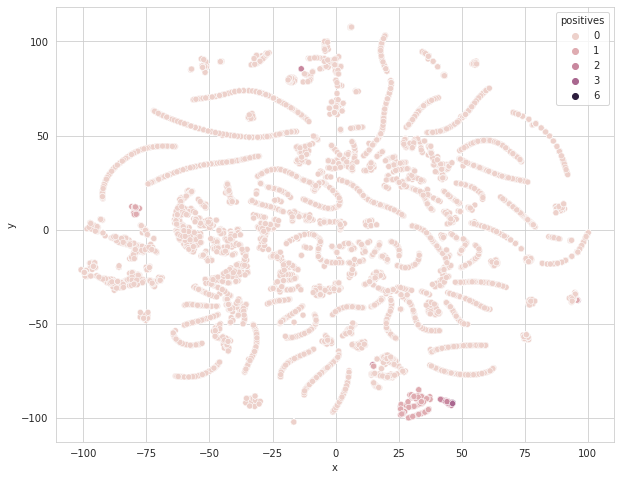

In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(cdf)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=X_embedded,x='x',y='y',hue='positives')
# plt.plot(X_embedded)
plt.show()

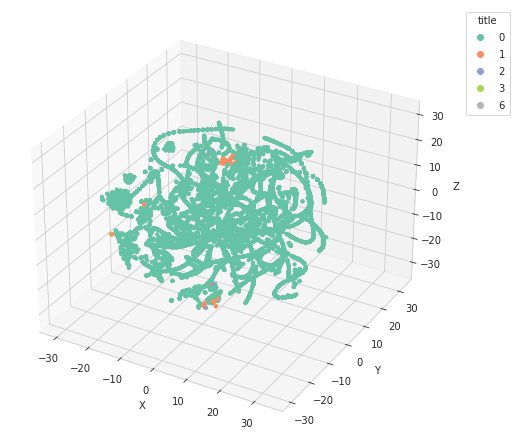

In [47]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(cdf)
X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'z':x[0][2],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("Set2").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.positives, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2, title="title",)
plt.show()

In [20]:
df.loc[df.positives==2][['scanned url','URL after redirects']]

,scanned url,URL after redirects
286,https://shar.es/abZWxn,http://www.todanoticia.com/85221/buscan-30-mil...
494,http://ht.ly/cT9s30r7yWw,https://www.mexnewz.mx/vacuna-de-astrazeneca-i...
1490,https://shar.es/abwhBy,https://boommedia.mx/rusia-busca-que-mexico-pa...
2066,http://onerazz.com/2020/09/07/australian-prime...,https://onerazz.com/2020/09/07/australian-prim...
2127,https://shar.es/abxCjj,https://bioprocessintl.com/bioprocess-insider/...
2180,http://dld.bz/jjayK,https://www.marketwatch.com/story/astrazeneca-...
2298,https://n9.cl/ebjz,https://www.excelsior.com.mx/global/vacuna-de-...
2512,http://dld.bz/jjbV4,https://elcomercio.pe/tecnologia/ciencias/coro...
2557,https://shar.es/abxBbS,https://bioprocessintl.com/bioprocess-insider/...
3003,https://amzn.to/3knEt2C,https://www.amazon.it/Friggitrice-Preimpostate...


In [21]:
df.loc[df.positives==3][['scanned url','URL after redirects']]

,scanned url,URL after redirects
779,https://nity.fr/go-SQRF3Q0,https://www.dreuz.info/2020/08/02/vaccin-contr...
2299,https://goo.su/23sA,None
3806,https://www.uttaranchaltoday.com/2020/09/09/as...,None
4075,https://trsondakika.com/dunya/astrazeneca-ve-o...,https://trsondakika.com/astrazeneca-ve-oxford-...
14658,https://goo.su/25hI,None


In [22]:
df.loc[df.positives==6][['scanned url','URL after redirects']]

,scanned url,URL after redirects
128,https://gofirstnews.com/astrazeneca-begins-cor...,None


### DB SCAN

In [42]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(cdf)

In [43]:
set(clustering.labels_)

{0}

In [38]:
from collections import Counter
from collections import defaultdict as ddict
def viewServer(VT):
    DATA = ddict(list)
    for key,val in Counter(df.loc[df.positives==VT].server).items():
        DATA['Server'].append(key)
        DATA['Count'].append(val)
        DATA['percentage from dataset'].append('{}%'.format(int(val)/len(df.loc[df.positives==VT].server)*100))
    return pd.DataFrame(DATA).sort_values(by='percentage from dataset', ascending=False)

In [39]:
viewServer(1)

,Server,Count,percentage from dataset
21,LiteSpeed,10,3.64963503649635%
3,openresty,9,3.2846715328467155%
1,NaN,66,24.087591240875913%
0,Sucuri/Cloudproxy,6,2.18978102189781%
5,Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/1....,6,2.18978102189781%
9,nginx,54,19.708029197080293%
10,cloudflare,50,18.248175182481752%
2,Apache,29,10.583941605839415%
8,Apache/2,5,1.824817518248175%
20,nginx/1.15.8,4,1.4598540145985401%


In [34]:
viewServer(2)

,Server,Count,percentage from dataset
3,NaN,3,6.8181818181818175%
9,Apache/2.4.29 (Ubuntu),2,4.545454545454546%
0,nginx,10,22.727272727272727%
5,cloudflare,10,22.727272727272727%
1,Apache,9,20.454545454545457%
4,Server,1,2.272727272727273%
6,Apache/2.4.7 (Ubuntu),1,2.272727272727273%
7,Apache/2.4.18 (Ubuntu),1,2.272727272727273%
8,nginx/1.10.3 (Ubuntu),1,2.272727272727273%
10,Apache/2.4.25 (Debian),1,2.272727272727273%


In [35]:
viewServer(3)

,Server,Count,percentage from dataset
0,cloudflare,3,60.0%
1,Apache-Coyote/1.1,2,40.0%


In [36]:
viewServer(6)

,Server,Count,percentage from dataset
0,LiteSpeed,1,100.0%
